# Meteors shower data synthesis
Data synthesis as the assignment project for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 18-11-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/data_synthesis.git) at GitHub.

___

## Introduction

...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Problem description

To generate (synthesise) a dataset to simulate meteors shower on a planet.

## Data categories and types

The following are envisaged data categories and types

* `Year` - Year of observation, integer from 1 to n
* `Entry`- No of atmosphere entry, integer following the Poisson distribution with lambda $lambda = 0.25$ (to be verified)
* `Impact` - No of surface impacts, binomial distribution as a function of size and angle of entry $f(size, angle)$
* Size of a meteor, exponential distribution (few large, many small)
* Density of a meteor, normal distribution
* Veleocity of a meteor hitting the surface, normal distribution ????
* Angle of entry, random ditribution in range 0-90
* Total crater area, calculated as a function of size, density, veleociy, angle and additional noise


## General assumptions

The scenario and data are both fictional, invented solely for the purpose of this project.  

The generate data is a simplified model with numerous assumptions and simplifications.
* ...

## Generating the data

In [ ]:
# creation of ampty data (just headings)
data = pd.DataFrame(columns = ["Year", "Entry", "Impact"]) 
data

### Year

Observations are recorded in one year intervals over a period of 100 years.


In [3]:
year = np.arange(1,11) # 10 years of observation
year

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
# assigning year values to the data array
data["Year"] = year
data.head()

,Year,Entry,Impact
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


### Atmosphere entry

Number of meteors entries to the atmosphere of the planet, represented by variable `atm_entry`, in my model is considered unpredictable event and of a chaotic nature (signigicant random noise). It is assumed that in a given year there may be none to _a very large number_ of entries, with a certain mean number. This will be represented by a **Poisson distribution**, with lambda assigned arbitrarily.

atm_entry_lambda 2.223785308086789
atm_entry_noise -683
min: 0
mean: 22.203
max: 94


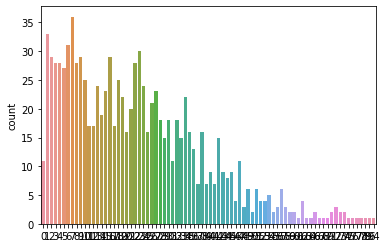

In [5]:
# defines lambda value for the poisson distribution
atm_entry_lambda = 1 + np.random.random() + np.random.randint(1, 2) # expected mean value - it gives a general shape of the distribution
# defines noise used to modify the results
atm_entry_noise = np.random.randint(-1000, 100) # extra random noise - expands the range of possible results and adds randomness


# test of the distribution for the above parameters - this sample is used only for illustration of the algorithm
# np.random.poisson()
atm_test = abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), 1000) + atm_entry_noise) # only positive or 'zero' values
print("atm_entry_lambda", atm_entry_lambda)
print("atm_entry_noise", atm_entry_noise)

print("min:", atm_test.min())
print("mean:", atm_test.mean())
print("max:", atm_test.max())
sns.countplot(atm_test)

##### Adding `Entry` values to the dataset.

In [6]:
data["Entry"] = abs(np.random.poisson(abs(atm_entry_lambda + abs(atm_entry_noise)), len(year)) + atm_entry_noise)
data

,Year,Entry,Impact
0,1,23,NaN
1,2,66,NaN
2,3,20,NaN
3,4,19,NaN
4,5,5,NaN
5,6,16,NaN
6,7,10,NaN
7,8,11,NaN
8,9,4,NaN
9,10,11,NaN
